## Load libraries

In [1]:
import specpy.mtspec as mtspec
import specpy.utils as utils
import specpy.mtcross as mtcross
import numpy as np
import matplotlib.pyplot as plt


## Load building data

In [171]:
data = np.loadtxt('../data/crisanto_mesetas.dat')
dt   = 1/200.
npts,ntr = np.shape(data)

print('npts, # of traces, dt ',npts, ntr, dt)

npts, # of traces, dt  360001 5 0.005


## Plot time series

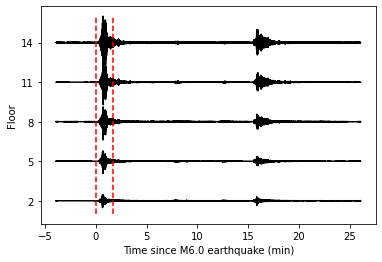

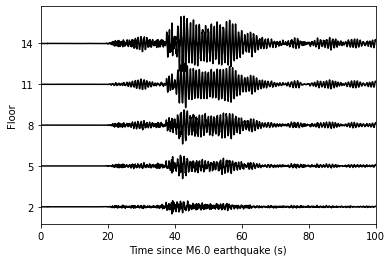

In [153]:
# create time vector
qtime = 3*60+55   # in seconds
t    = np.arange(npts)*dt - qtime
dmax = np.amax(data)/2

fig = plt.figure()
ax  = fig.add_subplot()
for i in range(ntr):
    ax.plot(t/60,data[:,i]/dmax+(i*3)+2,'k')
ax.set_xlabel('Time since M6.0 earthquake (min)')
ax.set_ylabel('Floor')
ax.set_yticks([2, 5, 8, 11, 14]);
ax.plot((0,0),(1,16),'r--')
ax.plot((1.66,1.66),(1,16),'r--')
fig = plt.figure()
ax  = fig.add_subplot()
for i in range(ntr):
    ax.plot(t,data[:,i]/dmax+(i*3)+2,'k')
ax.set_xlabel('Time since M6.0 earthquake (s)')
ax.set_xlim(0,100)
ax.set_ylabel('Floor')
ax.set_yticks([2, 5, 8, 11, 14]);
plt.savefig('cr_spectrogram00.png')

In [4]:
import specpy.mtspec as mtspec
import specpy.utils as utils
import specpy.mtcross as mtcross
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------
# Define desired parameters
#------------------------------------------------
nw     = 3.5
kspec  = 5 
twin   = 20.  # in seconds
olap   = 0.5  # max 0.99 - 99% overlap 
itrace = 4

nwin  = int(np.round(twin/dt))
if (olap<=0.0):
    njump = nwin
else:
    njump = int(np.round(twin*(1.0-olap))/dt)
nmax  = npts-nwin
nvec  = np.arange(0,nmax,njump)
tspec = (nvec*dt-qtime)/60.
nspec = len(nvec)
print(nwin,njump,nmax,npts)
print(nspec)


for i in range(nspec): #range(nspec):
    if (i%10==0):
        print('Loop ',i+1,' of ',nspec)
        
    i1  = nvec[i]
    i2  = i1+nwin
    x   = data[i1:i2+1,itrace]

    vn,theta = utils.dpss(nwin,nw,kspec)
    psd = mtspec.mtspec(x,nw,kspec,dt,iadapt=0,
                        vn=vn,lamb=theta)
    #freq2 ,spec = psd.rspec()
    freq2   = psd.freq
    spec    = psd.spec 
    qispec  = psd.qiinv()[0]   
#    print(np.min(qispec))
    
    fmin = 0.05
    fmax = 20.

    nf         = len(freq2)
    
    if (i==0):
        fres   = np.where((freq2>=fmin) & (freq2<=fmax))[0]
        nf     = len(fres)
        freq   = freq2[fres]
        sgram  = np.zeros((nf,nspec),dtype=float)
        print('nf, nspec', nf, nspec)
        
    sgram[:,i] = qispec[fres,0]
#    sgram[:,i] = spec[fres,0]    
print('Finished spectrogram')



4000 2000 356001 360001
179
Loop  1  of  179
nf, nspec 798 179
Loop  11  of  179
Loop  21  of  179
Loop  31  of  179
Loop  41  of  179
Loop  51  of  179
Loop  61  of  179
Loop  71  of  179
Loop  81  of  179
Loop  91  of  179
Loop  101  of  179
Loop  111  of  179
Loop  121  of  179
Loop  131  of  179
Loop  141  of  179
Loop  151  of  179
Loop  161  of  179
Loop  171  of  179
Finished spectrogram


# make figure

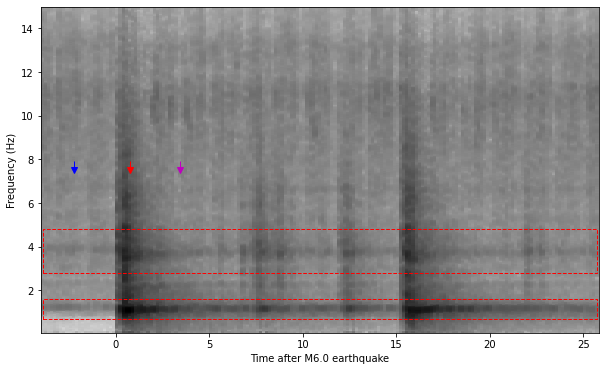

In [167]:
df   = freq[2]-freq[1]
fnw  = nw*df
lfnw = np.array((-fnw,+fnw))

fl_1 = 2.8
fh_1 = 4.8
fl_2 = 0.7
fh_2 = 1.6

iloc1 = np.where((freq>=fl_1) & (freq<=fh_1))[0]
iloc2 = np.where((freq>=fl_2) & (freq<=fh_2))[0]
k1 = 10
k2 = 28
k3 = 44

tbox  = np.array((np.min(tspec),np.max(tspec),
                 np.max(tspec),np.min(tspec),np.min(tspec)))
f2box = np.array((fl_2,fl_2,fh_2,fh_2,fl_2))
f1box = np.array((fl_1,fl_1,fh_1,fh_1,fl_1))

fig = plt.figure(figsize=(10, 6)) 
ax1 = fig.add_subplot()

X,Y = np.meshgrid(tspec,freq)
c = ax1.pcolor(X,Y,np.log10(sgram),cmap='Greys', shading='auto',)
        # vmax=1e7)
ax1.plot(tspec[k1],7.5,"bv")
ax1.plot(tspec[k1],7.5+0.3,"b|")
ax1.plot(tspec[k2],7.5,"rv")
ax1.plot(tspec[k2],7.5+0.3,"r|")
ax1.plot(tspec[k3],7.5,"mv")
ax1.plot(tspec[k3],7.5+0.3,"m|")
ax1.plot(tbox,f2box,'r--',linewidth=1)
ax1.plot(tbox,f1box,'r--',linewidth=1)
ax1.set_xlabel('Time after M6.0 earthquake')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_ylim((0.05,15))
plt.savefig('cr_spectrogram01.png')



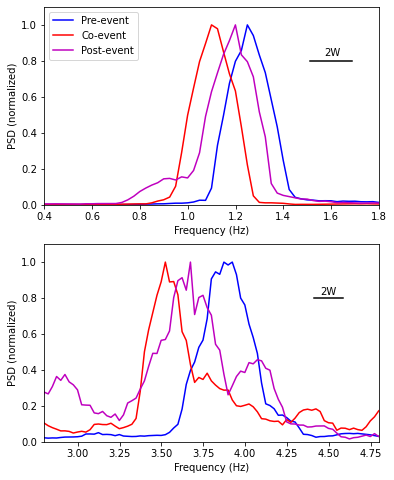

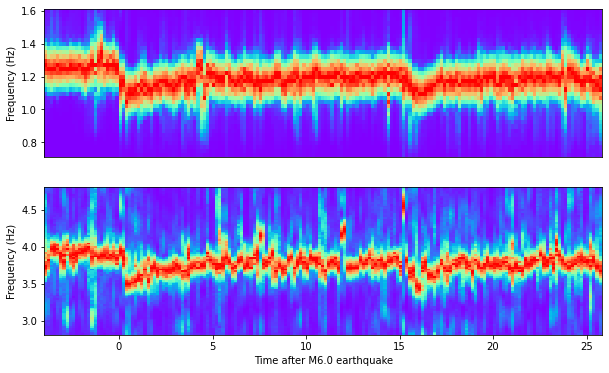

In [169]:
#------------------------------------------
# Plot spectrograms zoomed
#------------------------------------------

fig2 = plt.figure(figsize=(6,8))
ax2 = fig2.add_subplot(2,1,2)
ax2.plot(freq,sgram[:,k1]/np.max(sgram[iloc1,k1]),'b',
         label=r'time=%5.2f'%(tspec[10]));
ax2.plot(freq,sgram[:,k2]/np.max(sgram[iloc1,k2]),'r',
        label=r'time=%5.2f'%(tspec[28]));
ax2.plot(freq,sgram[:,k3]/np.max(sgram[iloc1,k3]),'m',
        label=r'time=%5.2f'%(tspec[44]));
ax2.set_xlim(fl_1,fh_1)
ax2.set_ylim(0,1.1)
ax2.plot(lfnw+4.5,[0.8,0.8],'k')
ax2.text(4.45,0.82,'2W')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('PSD (normalized)')

ax3 = fig2.add_subplot(2,1,1)
ax3.plot(freq,sgram[:,k1]/np.max(sgram[iloc2,k1]),'b',
         label='Pre-event');
ax3.plot(freq,sgram[:,k2]/np.max(sgram[iloc2,k2]),'r',
        label='Co-event');
ax3.plot(freq,sgram[:,k3]/np.max(sgram[iloc2,k3]),'m',
        label='Post-event');
ax3.set_xlim(0.4,fh_2+0.2)
ax3.set_ylim(0,1.1)
ax3.plot(lfnw+1.6,[0.8,0.8],'k')
ax3.text(1.57,0.83,'2W')
ax3.legend(loc='upper left')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('PSD (normalized)')
plt.savefig('cr_spectrogram02.png')


#------------------------------------------
# Plot spectrograms zoomed
#------------------------------------------

f1    = freq[iloc1]
X1,Y1 = np.meshgrid(tspec,f1)
s1    = sgram[iloc1,:]
for i in range(len(tspec)):
    s1[:,i] = s1[:,i]/np.max(s1[:,i])
f2  = freq[iloc2]
X,Y = np.meshgrid(tspec,f2)
s2  = sgram[iloc2,:]
for i in range(len(tspec)):
    s2[:,i] = s2[:,i]/np.max(s2[:,i])

fig = plt.figure(figsize=(10, 6)) 
ax1 = fig.add_subplot(2,1,2)
c = ax1.pcolor(X1,Y1,(s1),cmap='rainbow', shading='auto')
ax1.set_xlabel('Time after M6.0 earthquake')
ax1.set_ylabel('Frequency (Hz)')

ax2 = fig.add_subplot(2,1,1)
c = ax2.pcolor(X,Y,(s2),cmap='rainbow', shading='auto')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xticks([])
plt.savefig('cr_spectrogram03.png')
